In [5]:
import os
import sys

In [10]:
CAMERLS_ROOT='/home/vibhatha/data'
os.environ['CAMELS_ROOT']=CAMERLS_ROOT
DAYMET=f'{CAMERLS_ROOT}/camels/basin_mean_forcing/daymet'
MAURER_EXTENDED=f'{CAMERLS_ROOT}/camels/basin_mean_forcing/maurer_extended'
STREAMFLOW=f'{CAMERLS_ROOT}/camels/usgs_streamflow'
ATTRIBUTES=f'{CAMERLS_ROOT}/camels/camels_attributes_v2.0'
SHAPEFILENAME=f'HCDN_nhru_final_671'
SHAPEFILE=f'{CAMERLS_ROOT}/camels/camels_timeseries_full_resolution_basin_shapefile'

In [11]:
#check paths
assert os.path.exists(DAYMET) == True
assert os.path.exists(MAURER_EXTENDED) == True
assert os.path.exists(STREAMFLOW) == True
assert os.path.exists(ATTRIBUTES) == True

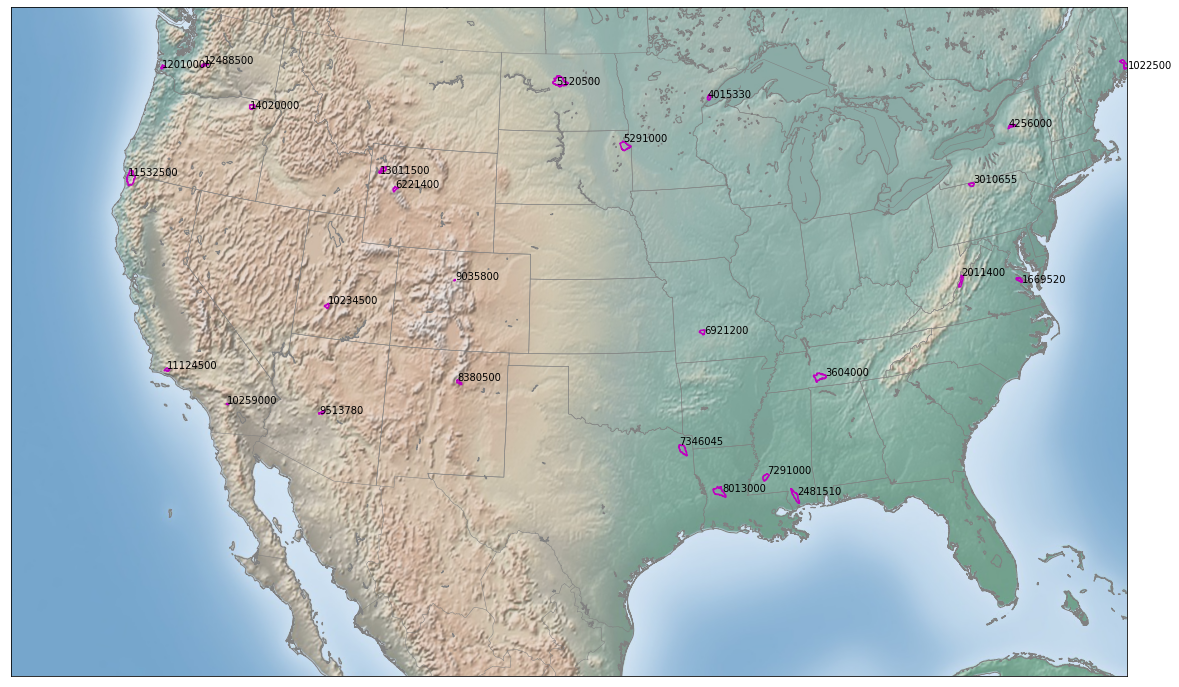

In [12]:
from main import basin_list
from papercode.plotutils import plot_basins

myregion = 'US'
shapefile = f"{SHAPEFILE}/{SHAPEFILENAME}"
plot_basins(shapefile, basin_list[myregion])

In [23]:
# set this to have persistent storage for the results.
# Otherwise commenting these out would default to the runs directory
# under the ealstm_regional_modeling
EXP_DIR = "EALSTM"
import os
os.makedirs(EXP_DIR, exist_ok=True)

# Change these parameters for experiments
batch_size = 256
dropout = 0.3
epochs = 3
hidden_size = 256
learning_rate = 1e-3
# loss function could be 'NSE' or 'MSE'
loss = 'NSE'

#
# True to train EALSTM model, False to use normal LSTM model
use_ealstm = False
# When not using ealstm, choose whether to use the static features
# False to NOT use the static feature, True to concat the static features
# at each time step.
concat_static = True
# False to use all characteristics of basins, True to use only
# the chosen most important ones
use_partial_attributes = False

# set run_name
from datetime import datetime
import numpy as np
now = datetime.now()
day = f"{now.day}".zfill(2)
month = f"{now.month}".zfill(2)
hour = f"{now.hour}".zfill(2)
minute = f"{now.minute}".zfill(2)
#
# set seed or use a randomaly generated one
seed = int(np.random.uniform(low=0, high=1e6))
#
# set run_name or use the generated one
run_name = f'run_{day}{month}_{hour}{minute}_seed{seed}'

#
# Setting the environment variables to pass to the training script
import os
if EXP_DIR:
    #EXP_DIR=EXP_DIR.replace(" ", "\ ")
    os.environ["LSTM_EXP_DIR"] = f"\"{EXP_DIR}\""
else:
    os.environ["LSTM_EXP_DIR"] = ""
os.environ["LSTM_RUN_NAME"] = run_name
os.environ["LSTM_SEED"] = str(seed)
os.environ["LSTM_MYREGION"] = myregion
os.environ["LSTM_BATCH_SIZE"] = str(batch_size)
os.environ["LSTM_EPOCHS"] = str(epochs)
os.environ["LSTM_DROPOUT"] = str(dropout)
os.environ["LSTM_HIDDEN_SIZE"] = str(hidden_size)
os.environ["LSTM_LEARNING_RATE"] = str(learning_rate)
if loss == 'MSE':
    os.environ["LSTM_USE_MSE"] = "--use_mse True"
else:
    os.environ["LSTM_USE_MSE"] = ""
if not use_ealstm:
    if concat_static:
        os.environ["LSTM_OR_EALSTM"] = "--concat_static True"
    else:
        os.environ["LSTM_OR_EALSTM"] = "--no_static True"
else:
    os.environ["LSTM_OR_EALSTM"] = ""
if use_partial_attributes:
    os.environ["LSTM_USE_PARTIAL_ATTRIBUTES"] = "--use_partial_attribs True"
else:
    os.environ["LSTM_USE_PARTIAL_ATTRIBUTES"] = ""

In [24]:
!python main_bench.py train --camels_root /home/vibhatha/data/camels --exp_dir="$LSTM_EXP_DIR" --seed $LSTM_SEED --region $LSTM_MYREGION --run_name $LSTM_RUN_NAME --epochs $LSTM_EPOCHS --dropout $LSTM_DROPOUT --batch_size $LSTM_BATCH_SIZE --hidden_size $LSTM_HIDDEN_SIZE --learning_rate $LSTM_LEARNING_RATE $LSTM_USE_MSE $LSTM_OR_EALSTM $LSTM_USE_PARTIAL_ATTRIBUTES

mode: train
camels_root: /home/vibhatha/data/camels
seed: 147744
exp_dir: "EALSTM"
run_name: run_2808_1855_seed147744
run_dir: None
cache_data: False
num_workers: 12
no_static: False
concat_static: True
use_mse: False
use_partial_attribs: False
epochs: 3
batch_size: 256
hidden_size: 256
dropout: 0.3
learning_rate: 0.001
region: US
clip_norm: True
clip_value: 1
initial_forget_gate_bias: 5
log_interval: 50
seq_length: 270
train_start: 1999-10-01 00:00:00
train_end: 2008-09-30 00:00:00
val_start: 1989-10-01 00:00:00
val_end: 1999-09-30 00:00:00
Sucessfully stored basin attributes in EALSTM/runs/run_2808_1855_seed147744/attributes.db.
100%|███████████████████████████████████████████| 26/26 [00:07<00:00,  3.42it/s]
Data Preparation Time 7.689216185
Data Loader Time 0.019910469
# Epoch 1:   0%|                                        | 0/334 [00:07<?, ?it/s]
Traceback (most recent call last):
  File "main_bench.py", line 889, in <module>
    globals()[config["mode"]](config)
  File "main_benc